In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Load in the data
# fashion_mnist is for clothes
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)
(60000, 28, 28, 1)


In [ ]:
# number of classes
# the function set returns a vector with only the unique values
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)


In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 47s 24ms/step - loss: 0.5289 - accuracy: 0.8050 - val_loss: 0.4208 - val_accuracy: 0.8407
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3741 - accuracy: 0.8582 - val_loss: 0.4093 - val_accuracy: 0.8399
Epoch 3/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3222 - accuracy: 0.8781 - val_loss: 0.3298 - val_accuracy: 0.8776
Epoch 4/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2857 - accuracy: 0.8922 - val_loss: 0.3109 - val_accuracy: 0.8879
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2603 - accuracy: 0.9013 - val_loss: 0.3090 - val_accuracy: 0.8890
Epoch 6/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2374 - accuracy: 0.9100 - val_loss: 0.3022 - val_accuracy: 0.8936
Epoch 7/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2192 - accuracy: 0.9164 - val_loss: 0.2996 -

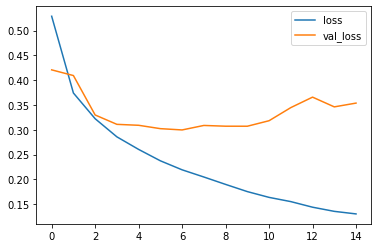

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Dal momento che la validation loss non decresce come la training c'è un po' di overfitting

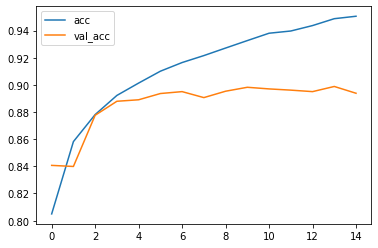

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[840   2  26  10   3   1 116   0   2   0]
 [  2 975   1  13   2   0   6   0   1   0]
 [  9   0 885   5  45   0  54   0   2   0]
 [ 21  11  29 865  32   0  42   0   0   0]
 [  2   1 113  15 793   0  75   0   1   0]
 [  1   0   0   0   0 969   0  18   0  12]
 [ 96   2  91  17  75   0 710   0   9   0]
 [  0   0   0   0   0  15   0 964   0  21]
 [  3   0   6   2   8   2   3   2 973   1]
 [  0   0   0   0   0   4   2  30   0 964]]


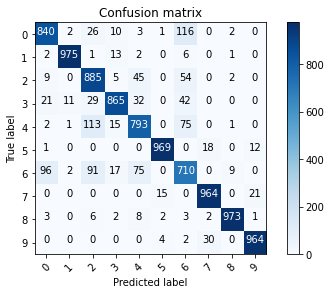

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

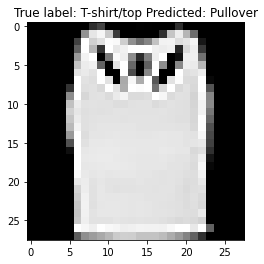

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));